('velocity is:', 110)
('angle is:', 58.18181818181818)


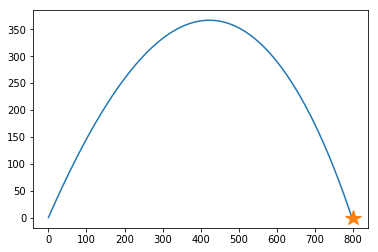

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# A function that returns trajectory of a projectile
# given initial velocity - v and angle - theta in degrees.
# Returns matching arrays x_coord, and y_coord.
# wantdrag = False if you want to artificially switch of the drag force, otherwise wantdrag = True
# changingG = Flase if you want to switch of changing of g value with altitude, otherwise changingG = True
def projectile(v, theta, wantdrag,changingG):
    # Physical constants in meters
    Rearth = 6371000
    # Initial conditions
    t = 0
    x = 0
    y = 0
    theta = np.deg2rad(theta) # Degrees converted to radians
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    # Time step in seconds
    dt = 0.01
    # Let's savey all x and y values in an array
    x_array = np.array([x])
    y_array = np.array([y])

    # Evolve the projectile in time until it hits the ground
    while y >= 0:
        # Gravity
        ax = 0 # No acceleration in x
        ay = -9.8 # g in m/s^2
        # Changing gravity with altitude. Only compute if user requests
        if changingG == True:
            ay *= (Rearth)**2/(Rearth + y)**2
        # Drag. Only compute if user requests
        if wantdrag == True:
            ad = -0.0004*(vx**2 + vy**2)
            costheta = vx/np.sqrt(vx**2 + vy**2)
            sintheta = vy/np.sqrt(vx**2 + vy**2)
            adx = ad*costheta
            ady = ad*sintheta
            ax += adx
            ay += ady
        # Now evolve
        x = x + vx*dt
        y = y + vy*dt
        vx = vx + ax*dt
        vy = vy + ay*dt
        t = t + dt
        # Append new value to the array
        x_array = np.append(x_array,x)
        y_array = np.append(y_array,y)
    
    # Print some info
    # print('Horizontal range is:', np.max(x_array), 'meters')
    # print('Maximum altitude reached is:', np.max(y_array), 'meters')
    # print('Time in the air is:', t, 'seconds')
    
    return [x_array, y_array]

# ===================================
# This is how you use the function
# ===================================
# [x1,y1] = projectile(2000,80,False,False)
# [x2,y2] = projectile(2000,80,False,True)
# ====================================
# This is how you plot the trajectory
# ====================================
# plt.plot(x1,y1,label='G changing off')
# plt.plot(x2,y2,label='G changing on')
# plt.legend()
# plt.xlabel('Displacement (m)')
# plt.ylabel('Altitude (m)')

#======================================
# Battleship
# ==========================================================================
# DISCLAIMER: This only works if ytarget = 0
# DISCLAIMER: Will have to modify the code to account for ytarget != 0 cases
# ==========================================================================
# Hit the target at this position
xtarget = 800
ytarget = 0 # currently ignored by the code

# How far does the canon go?
def canon_range(v0,theta):
    # Compute trajectory
    x, y = projectile(v0,theta,True,True)
    # Return the range
    return np.max(x)

# Initial velocity and stepsize in velocity
v0 = 0
dv0 = 10
# Check all angles between 0 and 90 degrees in small steps
Nsteps = 100
theta = np.linspace(0,90,Nsteps)
# Keep the values for range in this array
x_range = np.zeros(Nsteps)
target_missed = True
while target_missed:
    # Increase velocity if you fall short
    v0 += dv0
    for i in range(Nsteps):
        # For fixed initial velocity compute range for all values of theta
        x_range[i] = canon_range(v0,theta[i])
    #print(x_range)
    # Is target somewhere between maximum an minimum ranges for this v0?
    if xtarget > np.min(x_range) and xtarget < np.max(x_range):
        target_missed = False
    
# Return the value that was closest to the target 
# I copied this from https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
idx = (np.abs(x_range - xtarget)).argmin()
print('velocity is:', v0)
print('angle is:', theta[idx])

# Now plot to make sure it looks right
[x,y] = projectile(v0, theta[idx], True, True)
plt.plot(x,y)
plt.plot(xtarget, ytarget, '*',markersize=16)